In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\sriva\deeplearning\bankturn_over_dataset\excel\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
856,567,Germany,Female,49,5,134956.02,1,1,0,93953.84,1
519,707,France,Male,58,6,89685.92,1,0,1,126471.13,0
4052,616,Germany,Male,41,10,113220.20,2,1,1,114072.91,0
924,785,France,Female,34,9,70302.48,1,1,1,68600.36,0


In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.Geography.values

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [7]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
df.shape

(10000, 11)

In [9]:
tenure_exited_zero=df[df.Exited==0].Tenure
tenure_exited_one=df[df.Exited==1].Tenure


In [41]:
plt.hist([tenure_exited_zero,tenure_exited_one],color=['green','red'],label=['not exit','exit])
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.title('customer exit prediction visualization')
plt.legend()

SyntaxError: EOL while scanning string literal (438405093.py, line 1)

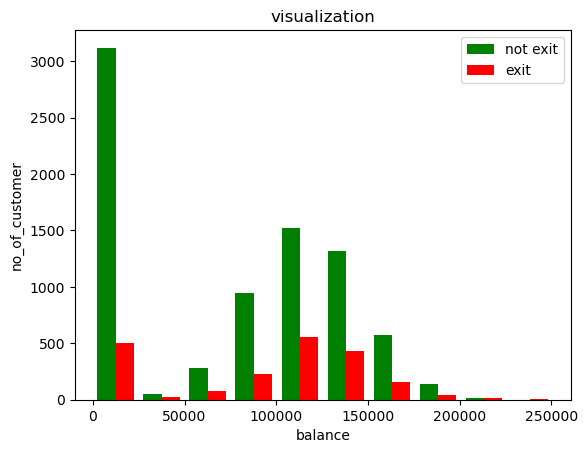

In [42]:
balance_exited_zero=df[df.Exited==0].Balance
balance_exited_one=df[df.Exited==1].Balance
plt.hist([balance_exited_zero,balance_exited_one],color=['green','red'],label=['not exit','exit'])
plt.xlabel('balance')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

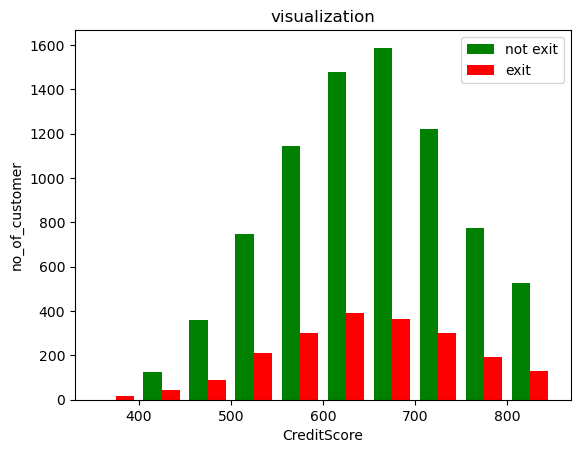

In [43]:
CreditScore_exited_zero=df[df.Exited==0].CreditScore
CreditScoree_exited_one=df[df.Exited==1].CreditScore
plt.hist([CreditScore_exited_zero,CreditScoree_exited_one],color=['green','red'],label=['not exit','exit'])
plt.xlabel('CreditScore')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

In [44]:
Age_exited_zero=df[df.Exited==0].Age
Age_exited_one=df[df.Exited==1].Age
plt.hist([Age_exited_zero,Age_exited_one],color=['green','red'],label=['not exit','exit])
plt.xlabel('Age')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

SyntaxError: EOL while scanning string literal (2936221488.py, line 3)

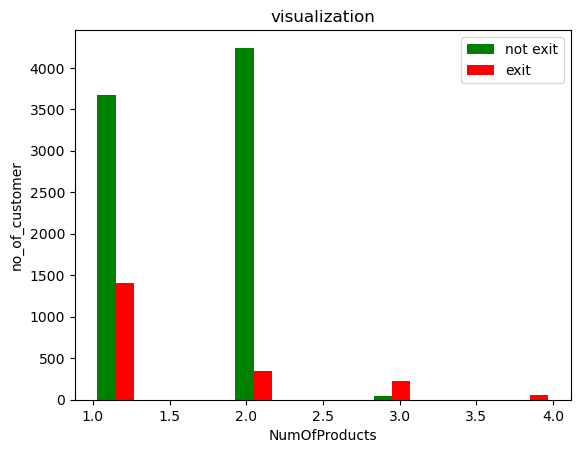

In [45]:
NumOfProducts_exited_zero=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_one=df[df.Exited==1].NumOfProducts
plt.hist([NumOfProducts_exited_zero,NumOfProducts_exited_one],color=['green','red'],label=['not exit','exit'])
plt.xlabel('NumOfProducts')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

In [46]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [47]:
unique_col_values(df)

Geography:['France' 'Spain' 'Germany']


In [48]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [49]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.head()
df1.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [51]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
col_to_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [22]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8808,0.806,1,0.243243,0.7,0.512236,1,1,1,0.222803,1,1,0,0
9263,0.384,1,0.175676,0.3,0.000000,2,1,1,0.576085,0,1,0,0
4409,0.812,0,0.310811,0.6,0.594066,1,0,1,0.252078,1,0,1,0


In [23]:
X=df1.drop('Exited', axis='columns')
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1


In [24]:
y=df1.Exited

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
len(X_train)

8000

In [28]:
X_train[0:5].shape

(5, 12)

In [29]:
len(X_test)

2000

In [30]:
X_train.shape

(8000, 12)

In [31]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
     keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4962 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7994
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8046
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8134
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8184
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8225
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8246
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8241
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8256
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3899 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8660
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8649
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8634
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8641
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8639
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8648
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8655
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8635
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8656
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 

In [32]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8565


[0.3461610972881317, 0.8565000295639038]

In [33]:
yp=model.predict(X_test)

63/63 [==============================] - 0s 923us/step


In [34]:
yp[0:4]

array([[0.03726908],
       [0.10814255],
       [0.08565135],
       [0.07452211]], dtype=float32)

In [35]:
y_predicted=[]
for i in yp:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)


In [36]:
y_predicted[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [37]:
y_test[0:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

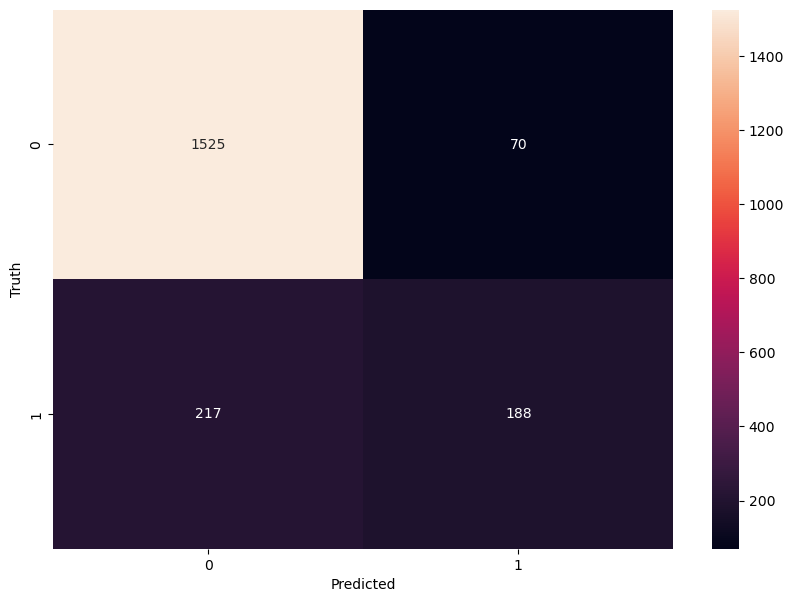

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1595
           1       0.73      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [52]:
#f1 score for not exit
2*(( 0.88*  0.96)/(0.88+0.96))

0.9182608695652175

In [54]:
#f1 score for exit
2*(( 0.73*0.46)/(  0.73+0.46))

0.5643697478991596